# Лабораторна робота №5. Алгоритми пошуку

#### **Тема.** Алгоритми пошуку

#### **Мета:** засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінювання їх складності.

Виконано: Черниш В'ячеслав, дата виконання 09.12.2024

<h2 style="text-align: center;">Хід роботи</h2>

**Лінійний пошук. Стратегія «грубої сили»**

In [7]:
# Якщо елемент не буде знайдено, виводиться -1
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1

# Тестування функції
search_item = int(input("Введіть шуканий елемент: "))
a = [32, 1, 3, 4, 2, 1]
result = linear_search(a, search_item)

if result != -1:
    print(f"Елемент знайдений на індексі: {result}")
else:
    print("Елемент не знайдений! -1")


Введіть шуканий елемент:  7


Елемент не знайдений! -1


**Завдання для самостійної роботи:** оцінити асимптотичну складність
алгоритму лінійного пошуку в О-нотації.

Асимптотична складність алгоритму лінійного пошуку:

Кращий випадок: O(1) - якщо елемент знаходиться на першій позиції

Гірший і середній випадок:O(n) - якщо елемент відсутній або знаходиться в кінці масиву,де n - розмір масиву

в загальному випадку складність лінійного пошуку — O(n).


**Пошук у відсортованому масиві. Бінарний пошук**

In [14]:

def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:  
        return -1
    middle = (left + right) // 2  
    if a_list[middle] == x:  
        return middle
    elif a_list[middle] < x:  
        return bin_search(a_list, x, middle + 1, right)
    else:  
        return bin_search(a_list, x, left, middle - 1)

a = list(range(7, 21))  

search_item = int(input("Введіть шуканий елемент: "))

result = bin_search(a, search_item, 0, len(a) - 1)

if result != -1:
    print(f"Елемент знайдений на індексі: {result}")
else:
    print("Елемент не знайдений.")


Введіть шуканий елемент:  7


Елемент знайдений на індексі: 0


**Завдання для самостійної роботи:**

1. *Оцінка асимптотичної складності алгоритму бінарного пошуку в О-нотації*

Алгоритм бінарного пошуку працює за принципом поділу списку навпіл на кожному кроці, що дозволяє ефективно зменшувати розмір області пошуку в два рази.

У кожному кроці алгоритм порівнює шуканий елемент з елементом на середині масиву та вирішує, чи продовжувати пошук у лівій, чи в правій частині.

Розмір області пошуку зменшується вдвічі на кожній ітерації.

Отже, часова складність бінарного пошуку в О-нотації є:

$O(log n)$, де 𝑛 — кількість елементів у масиві.


2. *Написати функцію, яка б могла повертати датафрейм з таким складом
полів: («n», «time»), де n – розмір масиву для функції linear_searh();*

In [33]:
import time
import pandas as pd
import random


def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1


def linear_search_time(n_values):
    times = []
    for n in n_values:
        a_list = random.sample(range(1, 10*n), n)  
        start_time = time.time()
        linear_search(a_list, -1)  
        end_time = time.time()
        times.append(end_time - start_time)  
    return pd.DataFrame({'n': n_values, 'time': times})

# Тестування функції
n_values = [600000, 700000, 900000, 1200000, 13000000]  
linear_df = linear_search_time(n_values)
print(linear_df)


          n      time
0    600000  0.031860
1    700000  0.034116
2    900000  0.040583
3   1200000  0.057950
4  13000000  0.577345


3. *Написати функцію, яка б могла повертати датафрейм з таким складом
полів: («n», «time»), де n – розмір масиву для функції bin_searh();*

In [27]:

def bin_search(a_list, x, left, right):
    if left > right:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif a_list[middle] < x:
        return bin_search(a_list, x, middle + 1, right)
    else:
        return bin_search(a_list, x, left, middle - 1)


def bin_search_time(n_values):
    times = []
    for n in n_values:
        a_list = sorted(random.sample(range(1, 10*n), n))  
        start_time = time.time()
        bin_search(a_list, -1, 0, len(a_list) - 1)  
        end_time = time.time()
        times.append(end_time - start_time)  
    return pd.DataFrame({'n': n_values, 'time': times})

# Тестування функції
bin_values = [600000, 700000, 900000, 1200000, 13000000]  
bin_df = bin_search_time(bin_values)
print(bin_df)


          n      time
0    600000  0.000000
1    700000  0.000000
2    900000  0.000000
3   1200000  0.000000
4  13000000  0.001002


4. *За результатами попередніх завдань побудувати графіки залежності часу
виконання процедури пошуку від розміру масиву.*

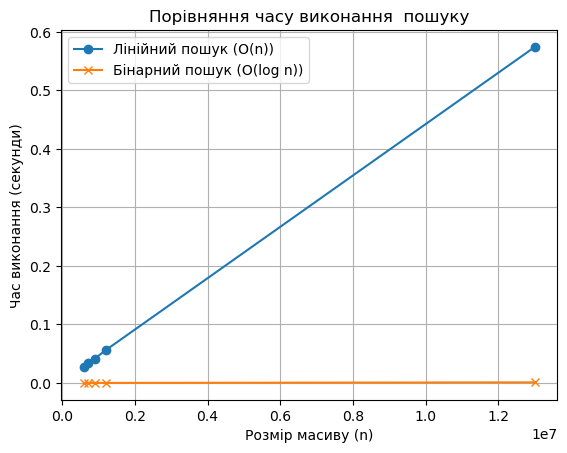

In [32]:
import matplotlib.pyplot as plt

# графіки
def plot_time_comparison(linear_df, bin_df):
    plt.plot(linear_df['n'], linear_df['time'], label='Лінійний пошук (O(n))', marker='o')
    plt.plot(bin_df['n'], bin_df['time'], label='Бінарний пошук (O(log n))', marker='x')
    
    plt.xlabel('Розмір масиву (n)')
    plt.ylabel('Час виконання (секунди)')
    plt.title('Порівняння часу виконання  пошуку')
    plt.legend()
    plt.grid(True)
    plt.show()

#функції для графіка
plot_time_comparison(linear_df, bin_df)


5. Оцінка ефективності алгоритмів
Лінійний пошук має складність O(n), що означає, що час виконання зростає лінійно зі збільшенням розміру масиву.
Бінарний пошук має складність O(log n), що означає, що час виконання зростає значно повільніше, навіть якщо розмір масиву збільшується в кілька разів.
На графіку видно, що при великих розмірах масиву бінарний пошук працює значно швидше за лінійний пошук, і це показує перевагу бінарного пошуку при великих обсягах даних.

# **Контрольні питання**

1. **Сформулювати задачу пошуку.**
   Умова: Дано масив цілих чисел. Потрібно знайти індекс заданого числа двома способами

   Вхідний масив: [3, 6, 7, 8, 9, 11, 13, 21, 12]
Шуканий елемент: 13

In [41]:
# Лінійний пошук
def linear_search(a_list, x):
    for i in range(len(a_list)):
        if a_list[i] == x:
            return i  # Повертаємо індекс елемента
    return -1  # Повертаємо -1, якщо елемент не знайдений

# Бінарний пошук
def binary_search(a_list, x):
    a_list = sorted(a_list)  # Сортуємо масив перед пошуком
    left, right = 0, len(a_list) - 1
    while left <= right:
        mid = (left + right) // 2
        if a_list[mid] == x:
            return mid  # Повертаємо індекс елемента
        elif a_list[mid] < x:
            left = mid + 1
        else:
            right = mid - 1
    return -1  # Повертаємо -1, якщо елемент не знайдений

# Задача 1: Лінійний пошук
a_list = [3, 6, 7, 8, 9, 11, 13, 21, 12]
search_item = 13
result_linear = linear_search(a_list, search_item)
print(f"Лінійний пошук: Елемент {search_item} знайдений на позиції {result_linear}")

# Задача 2: Бінарний пошук (масив спочатку сортується)
a_list_unsorted = [3, 6, 7, 8, 9, 11, 13, 21, 12]
search_item = 13
result_binary = binary_search(a_list_unsorted, search_item)
print(f"Бінарний пошук (масив відсортовано): Елемент {search_item} знайдений на позиції {result_binary}")


Лінійний пошук: Елемент 13 знайдений на позиції 6
Бінарний пошук (масив відсортовано): Елемент 13 знайдений на позиції 7


2. **Які критерії можна використовувати для оцінювання ефективності алгоритмів пошуку?
Основні критерії для оцінювання ефективності алгоритмів пошуку:**

Часова складність: Оцінка кількості операцій, які виконує алгоритм для пошуку елемента в залежності від розміру колекції даних.

Просторова складність: Оцінка кількості пам'яті, яку алгоритм потребує для виконання.

Точність: Чи знаходить алгоритм елемент, якщо він існує, та чи правильно повідомляє про його відсутність.

Стабільність: Як алгоритм поводиться при наявності однакових елементів у колекції.

3. **Що таке лінійний пошук і яка його асимптотична складність?**
   
Лінійний пошук (або пошук методом перебору) полягає в тому, що елемент перевіряється по черзі, поки не буде знайдений або не закінчиться весь список.

Асимптотична складність: O(n), де n — розмір масиву, оскільки у найгіршому випадку потрібно перевірити кожен елемент.

4. **Що таке бінарний (двійковий) пошук і в чому полягає його головний принцип роботи?
Бінарний пошук — це алгоритм пошуку в відсортованому масиві, який працює за принципом поділу масиву на дві половини. Алгоритм порівнює шуканий елемент з елементом у середині масиву:**

Якщо шукане значення менше за середній елемент, пошук продовжується в лівій половині.

Якщо шукане значення більше — в правій половині. Цей процес повторюється, поки елемент не буде знайдений або кількість елементів не стане рівною нулю.

Асимптотична складність: O(log n), де 𝑛 — розмір масиву.

5. **Які переваги і недоліки використання бінарного пошуку порівняно з лінійним?**

**Переваги бінарного пошуку:**

Швидкість: *У відсортованому масиві бінарний пошук є значно швидшим за лінійний пошук, оскільки його складність — 
O(logn), а лінійного пошуку — O(n).*

Ефективність: *для великих масивів, де час виконання критичний.*

**Недоліки бінарного пошуку:**

Потрібно відсортоване введення: *Для бінарного пошуку масив повинен бути відсортований, що додає додаткові витрати на сортування.*

Складність реалізації: *Бінарний пошук складніший у реалізації, ніж лінійний пошук.*

**Переваги лінійного пошуку:**

Простота реалізації: *Лінійний пошук простий і не вимагає попереднього сортування масиву.*

Підходить *для невеликих або не відсортованих масивів.*

**Недоліки лінійного пошуку:**

Повільний для великих масивів: *У найгіршому випадку лінійний пошук має складність 
O(n), що робить його менш ефективним для великих наборів даних.*

6. **Які ще алгоритми пошуку існують, окрім лінійного і бінарного?**

**Пошук за допомогою хешування:** Шукає елемент в хеш-таблиці, що дозволяє виконувати пошук за час O(1) в середньому випадку.

**Алгоритм пошуку за допомогою дерев:** Пошук в структурах даних, таких як бінарне дерево пошуку (BST), де час виконання може бути O(logn), якщо дерево збалансоване.

**Пошук у графах наприклад, пошук в ширину (BFS) або в глибину (DFS):** Використовується для пошуку елементів або шляху в графах.